
¡Hola, Andres!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>



# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

<div class="alert alert-block alert-info">
El operador Megaline nos ha proporcionado información valiosa sobre el uso que le dan sus clientes a su servicios de telecomunicaciones. Los servicios, que consta de dos planes (Surf y Ultimate), se estan creado con el objetivo que los clientes aprovechen al máximo las llamada, internet y los mensajes.
<br/>
Cada plan, contiene un costo por si solo, y cada uno incluye topes en cada uno de los servicios, y costos extras si se exceden esos topes de acuerdo al plan. Así que Megaline quiere saber si los clientes están por debajo de esos topes o tal vez, excedidos de ellos mismo.
<br/>
Un analisis detallado de esto da a Megaline la visión de si sus planes son suficientes, o tal vez sea necesario nuevos planes intermedios o más exclusivos dependiendo del uso real.
<br/>
Lo que haré como analista de dato, además de confirmar que la data está en las condiciones óptimas para ser analizada, mostraré gráficas de consumos en los tres rubros. Gráficas de los pagos mensuales que se hace por cliente, además de comparaciones entre cada plan. Con esto, Megaline podrá tomar sus propias deciciones.
<br/>
Finalemente buscaremos probar las hipótesis:
</br>
El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.
</br>
El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.

</b> <a class="tocSkip"></a>
</div>

## Inicialización

In [162]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy import stats as st

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recomiendo cargar la libreria math. De esta manera, puedes realizar redondeos con otros métodos. 
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Cargar datos

In [163]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

<div class="alert alert-block alert-info">

Prepararemos los datos tabla por tabla. En cada tabla nos interesa ver:
</br>Si hay nulos o ausentes. 
</br>Conocer si tenemos imformación duplicada.
</br>Tener las columnas con los tipos de datos adecuados para su manejo.
</br>Crear columnas que nos servirán para las posteriores uniones entre las mismas tablas.
</b> <a class="tocSkip"></a>
</div>

## Tarifas

In [164]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [165]:
# Imprime una muestra de los datos para las tarifas
print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


<div class="alert alert-block alert-info">

La tabla de tarifas consta solo de dos registro que van acorde a lo descrito en al documentación. El único dato que no coincide es el nombre de la columna [usd_monthly_pay], en la documentación esto está descrito como [usd_monthly_fee], no veo necesario renombrar la columnas, solo es saber qué información tenemos en ella.
</br>
Por otro lado, se observa que "plan_name" es un categoría, y está como object, así que haremos ese cambio de tipo.
</b> <a class="tocSkip"></a>
</div>

## Corregir datos

In [166]:
# Cambiamos el tipo de dato de plan_name a category
plans['plan_name'] = plans['plan_name'].astype('category')

<div class="alert alert-block alert-info">

Según la documentación, el cobro de las tarifas del internet, el total de lo consumido en el mes se redondea hacía arriba para cobrar Gigas completos. Lo mismo va a pasar con los minutos de llamdas, así que mantendremos esto en cuenta cuando lleguemos a ello.
</b> <a class="tocSkip"></a>
</div>


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo, solamente te sugiero que en este apartado menciones un poco sobre la transformación que se debe realizar de megabytes a gigabytes. 
</div>

## Usuarios/as

In [167]:
# Analizamos los datos de las USERS
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()
# Se oberva que la columna churn_date tiene valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [168]:
# Imprime una muestra de datos para usuarios
print(users.head())
print("La cantidad de valores duplicados son:",users.duplicated().sum())
# se obseva que no tiene valores duplicados

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  
La cantidad de valores duplicados son: 0


<div class="alert alert-block alert-info">
Se observa que "churn_date" tiene valores ausente pero eso es algo esperado, ya que esto significa que al momento de que se cargaron estos datos, ese usuario tenía su plan activo.
Por otro lado, la columna [reg_date] está como Object y eso se debería de cambiar como tipo fecha.
</b> <a class="tocSkip"></a>
</div>

### Corregir los datos

In [169]:
# Cambiamos el tipo de dato de reg_date 
users['reg_date'] =  pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
# convertimo en categoría la columnba de "plan"
users['plan']  =  users['plan'].astype('category')

## Llamadas

In [170]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()
# Se oberva que no tiene nullos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
La cantidad de valores duplicados son: 0
     duration  tot_dur
0        0.00    26834
837      8.37      102
402      4.02      102
391      3.91      101
430      4.30      100


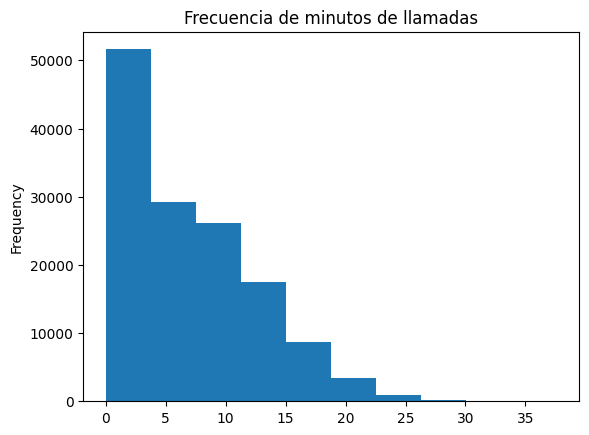

In [171]:
# Imprime una muestra de datos para las llamadas
print(calls.head())
print("La cantidad de valores duplicados son:",calls.duplicated().sum())
# se obseva que no tiene valores duplicados

#minutos de llamadas
calls_minutes = calls.groupby(by='duration')['id'].count().reset_index(name='tot_dur').sort_values(by='tot_dur',ascending=False)
print(calls_minutes.head())

calls['duration'].plot(kind='hist')
plt.title('Frecuencia de minutos de llamadas')
plt.show()

<div class="alert alert-block alert-info">
No tenemos valores ausente ni duplicados.
 </br>   Se observa que  la columna "call_date" está como Object y eso se debería de cambiar como tipo fecha.
</b> <a class="tocSkip"></a>
</div>

### Corregir los datos

In [172]:
# Cambiamos el tipo de dato de "call_date"
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

### Enriquecer los datos

<div class="alert alert-block alert-info">
Como vamos a estar trabajando en periodos, va a ser importante que tengamos la columna de Year_Month para las agrupaciones y uniones pertinentes pertinentes. En la documentacion de dice que solo tiene datos del año 2018, pero aun así, me gustar tener el dato en año-mes para que este análisis pueda ser usado en diferentes periodos.
</b> <a class="tocSkip"></a>
</div>

In [173]:
# Creamos las columnas de Year y Month
calls['year'] = calls['call_date'].dt.year
calls['month'] = calls['call_date'].dt.month
calls['year_month'] = calls['call_date'].dt.to_period('M')

<div class="alert alert-block alert-info">
Del histograma de minutos de llamada se observa que existe un gran volumen de registros en llamadas con duracion de 0 minutos. Podría ser un error en la inserción de la data, pero dado que nos interesan los registro con llamdas mayor a ceros, vamos a considerar excluir estos registros en los sucesivos pasos.
</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Qué podríamos decir hasta el momento de las llamadas que tienen una duración de 0?
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Mensajes

In [174]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()
# Se oberva que no tiene nullos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [175]:
# Imprime una muestra de datos para los mensajes
print(messages.head())
print("La cantidad de valores duplicados son:",messages.duplicated().sum())
# se obseva que no tiene valores duplicados



         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
La cantidad de valores duplicados son: 0


<div class="alert alert-block alert-info">
No tenemos valores ausente ni duplicados.
 </br>   
Se observa que  la columna "message_date" está como Object y eso se debería de cambiar como tipo fecha.
</b> <a class="tocSkip"></a>
</div>

### Corregir los datos

In [176]:
# Cambias el tipo de dato de la columna "message_date" a tipo fecha
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

### Enriquecer los datos

<div class="alert alert-block alert-info">
Como vamos a estar trabajando en periodos, va a ser importante que tengamos la columna de Year_Month para las agrupaciones y uniones pertinentes pertinentes. Aunque se menciona que solo hay datos del 2018, me interesa hacer la unión de Año-mes para que este análisis pueda ser útil en cualquier tipo de periodo.
</b> <a class="tocSkip"></a>
</div>

In [177]:
messages['year'] = messages['message_date'].dt.year
messages['month'] = messages['message_date'].dt.month
messages['year_month'] = messages['message_date'].dt.to_period('M')

## Internet

In [178]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()
# Se observa que hay valores ausentes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [179]:
# Imprime una muestra de datos para el tráfico de internet
print(internet.head())
print("La cantidad de valores duplicados son:",internet.duplicated().sum())
# se obseva que no tiene valores duplicados

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
La cantidad de valores duplicados son: 0


<div class="alert alert-block alert-info">
Se observa que  la columna "session_date" está como Object y eso se debería de cambiar como tipo fecha.
</b> <a class="tocSkip"></a>
</div>

### Corregir los datos

In [180]:
#Cambiamos el tipo de la columna "session_date" a tipo fecha
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

### Enriquecer los datos

<div class="alert alert-block alert-info">
Como vamos a estar trabajando en periodos, va a ser importante que tengamos nuestras columnas de Year y Month separadas para las agrupaciones pertinentes.
</b> <a class="tocSkip"></a>
</div>

In [181]:
internet['year'] = internet['session_date'].dt.year
internet['month'] = internet['session_date'].dt.month
internet['year_month'] = internet['session_date'].dt.to_period('M')

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo solamente comentar que cuando agrupemos los datos vamos a tener que redondear hacia arriba lo valores de la transformación de mbegabyter a gigabyte, para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.Por lo que es necesario hacer la transformación de mb a gb y después hacer el redondeo.  
</div>

## Estudiar las condiciones de las tarifas

In [182]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregar datos por usuario


<div class="alert alert-block alert-info">
Comenzaremos con las agrupaciones que serán relevantes a lo largo del proyecto.
    </br> En la tablas de "calls","internet" y "messages", por cada usuario, y cada fecha, tenemos el registro de cada clase. Como nos interesan los periodos de "meses" y por cada usuario, hacemos el conteo total de llamadas, duración de las llamadas, total de mensajes usados, y total de megas de internet usado por cada usario y año-mes.
</b> <a class="tocSkip"></a>
</div>

In [183]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_by_user = calls.groupby(by=['user_id','year_month'])['user_id'].count().reset_index(name='call_count')
print(calls_by_user)

      user_id year_month  call_count
0        1000    2018-12          16
1        1001    2018-08          27
2        1001    2018-09          49
3        1001    2018-10          65
4        1001    2018-11          64
...       ...        ...         ...
2253     1498    2018-12          39
2254     1499    2018-09          41
2255     1499    2018-10          53
2256     1499    2018-11          45
2257     1499    2018-12          65

[2258 rows x 3 columns]



<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>

In [184]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
calls_minutes_by_user = calls.groupby(by=['user_id','year_month'])['duration'].sum().reset_index(name='call_durations')
###### Vamos a redondear hacía arriba los minutos de llamadas para calcular correctamente el uso y en su caso, los cargos por exceso de consumo.
calls_minutes_by_user['call_durations'] = calls_minutes_by_user['call_durations'].apply(math.ceil)

print(calls_minutes_by_user)

      user_id year_month  call_durations
0        1000    2018-12             117
1        1001    2018-08             172
2        1001    2018-09             298
3        1001    2018-10             375
4        1001    2018-11             405
...       ...        ...             ...
2253     1498    2018-12             325
2254     1499    2018-09             331
2255     1499    2018-10             364
2256     1499    2018-11             289
2257     1499    2018-12             469

[2258 rows x 3 columns]


<div class="alert alert-block alert-info">
Ya tenemos los minutos de llamadas en el mes redondeadas hacia arriba.
</b> <a class="tocSkip"></a>
</div>

In [185]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_by_user = messages.groupby(by=['user_id','year_month'])['user_id'].count().reset_index(name='messages_count')
print(messages_by_user)


      user_id year_month  messages_count
0        1000    2018-12              11
1        1001    2018-08              30
2        1001    2018-09              44
3        1001    2018-10              53
4        1001    2018-11              36
...       ...        ...             ...
1801     1496    2018-09              21
1802     1496    2018-10              18
1803     1496    2018-11              13
1804     1496    2018-12              11
1805     1497    2018-12              50

[1806 rows x 3 columns]


In [186]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_by_user = internet.groupby(by=['user_id','year_month'])['mb_used'].sum().reset_index(name='internet_consumed')

#print(internet_by_user)
##Convertimos los megabyte a Gigabyt y redondeamos hacia arriba
internet_by_user['internet_consumed'] = (internet_by_user['internet_consumed']/1024).apply(math.ceil)
print(internet_by_user)

      user_id year_month  internet_consumed
0        1000    2018-12                  2
1        1001    2018-08                  7
2        1001    2018-09                 14
3        1001    2018-10                 22
4        1001    2018-11                 19
...       ...        ...                ...
2272     1498    2018-12                 23
2273     1499    2018-09                 13
2274     1499    2018-10                 20
2275     1499    2018-11                 17
2276     1499    2018-12                 22

[2277 rows x 3 columns]


<div class="alert alert-block alert-info">
Ya tenemos los megabyte en el mes redondeadas hacia arriba y convertidos a Gigabytes.
</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-info">
Ahora, todas las tablas de agrupación tienen una relación unica en común, que es [user_id','year_month'], con eso podemos crear nuestra tabla con la información acumulada completa, es decir, ya tenemos, para cada usuario, para cada Año-Mes; el conteo total de llamadas, la duración de las llamadas, total de mensajes usados, y total de megas de internet usado .
</b> <a class="tocSkip"></a>
</div>

In [187]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
full_information = calls_by_user.merge(calls_minutes_by_user, on=['user_id','year_month'], how='inner')
full_information = full_information.merge(messages_by_user, on=['user_id','year_month'], how = 'inner')
full_information = full_information.merge(internet_by_user, on=['user_id','year_month'], how = 'inner')
print(full_information.head())


   user_id year_month  call_count  call_durations  messages_count  \
0     1000    2018-12          16             117              11   
1     1001    2018-08          27             172              30   
2     1001    2018-09          49             298              44   
3     1001    2018-10          65             375              53   
4     1001    2018-11          64             405              36   

   internet_consumed  
0                  2  
1                  7  
2                 14  
3                 22  
4                 19  


<div class="alert alert-block alert-info">
Ademas, tenemos el plan usado, así que con eso podemo agregar las tarifas de cada plan para así tener las información total que usaremos.
</b> <a class="tocSkip"></a>
</div>

In [188]:
# Añade la información de la tarifa
full_information = full_information.merge(users, on=['user_id'], how = 'inner')
full_information = full_information.merge(plans, left_on='plan', right_on='plan_name', how = 'inner')
print(full_information.head())

   user_id year_month  call_count  call_durations  messages_count  \
0     1000    2018-12          16             117              11   
1     1006    2018-11           2              10              15   
2     1006    2018-12           9              55             139   
3     1008    2018-10          71             451              21   
4     1008    2018-11          63             423              37   

   internet_consumed first_name last_name  age  \
0                  2   Anamaria     Bauer   45   
1                  3     Jesusa  Bradford   73   
2                 32     Jesusa  Bradford   73   
3                 17      Emely   Hoffman   53   
4                 24      Emely   Hoffman   53   

                                     city  ...      plan  churn_date  \
0   Atlanta-Sandy Springs-Roswell, GA MSA  ...  ultimate         NaN   
1  San Francisco-Oakland-Berkeley, CA MSA  ...  ultimate  2018-12-18   
2  San Francisco-Oakland-Berkeley, CA MSA  ...  ultimate  2018-12-18

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

<div class="alert alert-block alert-info">
Ahora, tenemos la certeza que cada RENGLON de esta tabla tenemos:
   </br> Al usuario.
   </br> El año-mes en cuestión.
   </br> El plan que tiente contratado y por ende los límites de mensajes, tiempo en llamadas y los megas límites que tiene.
   </br> El total de mensajes realizados en ese periodo.
   </br> El total de minutos en llamadas de esperiodo.
   </br> El total de megas consumidos en ese periodo.
</br> Así que con las diferencias podemos saber si en dicho perido se excedió en laguno de lo contratado. Como por lo excedido hay una tarifa especial, vamos a hacer la diferencia de lo usado contra lo contratado. Si eso es mayor a cero, entonces nos quedamos con esa diferencia, pero eso eso es menor o igual a cero,nos quedamos con el cero. No nos interesa que no se hayan excedido para el tema de costos adiconales.
</b> <a class="tocSkip"></a>
</div>

In [189]:
# Calcula el ingreso mensual para cada usuario
#Calculamos los minutos excedidos en las llamas que se hayan podide
full_information['minutes_exceded'] = np.where(full_information['call_durations']-full_information['minutes_included']>0, full_information['call_durations']-full_information['minutes_included'],0)
#Imprimimos un ejemplo donde sí se haya excedido los minitos.
print(full_information.sort_values(by='minutes_exceded', ascending=False).head(2))

#Calculamos los mensajes excedidos 
full_information['messsages_exceded'] = np.where(full_information['messages_count']-full_information['messages_included']>0, full_information['messages_count']-full_information['messages_included'],0)
#Imprimimos un ejemplo donde sí se haya excedido los minitos.
print(full_information.sort_values(by='messsages_exceded', ascending=False).head(2))

#Calculamos losc megas excedidos 
full_information['mb_exceded'] = np.where(full_information['internet_consumed']-(full_information['mb_per_month_included']/1024)>0,full_information['internet_consumed']-(full_information['mb_per_month_included']/1024),0)
#Imprimimos un ejemplo donde sí se haya excedido los minitos.
print(full_information.sort_values(by='mb_exceded', ascending=False).head(2))


#Ahora hacemos las multiplicaciones para ver el precio extra donde se excede de los límites del paquete.
full_information['cost_by_exceded']=full_information['mb_exceded']*full_information['usd_per_gb'] + full_information['messsages_exceded']*full_information['usd_per_message']+full_information['minutes_exceded']*full_information['usd_per_minute']
print(full_information.sort_values(by='cost_by_exceded', ascending=False).head(2))

# Con esto ya tenemos el pago mensual de cada ususaio
full_information['monthly_payment'] = full_information['cost_by_exceded']+full_information['usd_monthly_pay']
print(full_information.sort_values(by='monthly_payment', ascending=False).head(2))

      user_id year_month  call_count  call_durations  messages_count  \
1239     1267    2018-12         205            1432             125   
1516     1365    2018-12         180            1284              45   

      internet_consumed first_name last_name  age  \
1239                 37        Gia    Parker   53   
1516                  9    Milford      Rush   19   

                               city  ... churn_date messages_included  \
1239           St. Louis, MO-IL MSA  ...        NaN                50   
1516  Grand Rapids-Kentwood, MI MSA  ...        NaN                50   

     mb_per_month_included  minutes_included  usd_monthly_pay  usd_per_gb  \
1239                 15360               500               20          10   
1516                 15360               500               20          10   

      usd_per_message  usd_per_minute  plan_name  minutes_exceded  
1239             0.03            0.03       surf              932  
1516             0.03            0.

<div class="alert alert-block alert-info">
En las creaciones de los DataFrame de "call" y "internet", ya realicé los redondeados de la duración de las llamadas y redondear la transformación de megabytes a gigabytes. Para calcular el costo excedido en el interte, tuvo que cambiar los 'mb_per_month_included' as Giga para hacer correcta la comparación.
</b> <a class="tocSkip"></a>
</div>


<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recuerda que para este punto, es necesario que ya tengamos los valores redondeados de la duración de las llamadas y redondear la transformación de megabytes a gigabytes. Esto cobra importancia dado que estamos calculando por cuanto se paso cada usuario, entonces el no redondear puede alterar este valor.
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Estudia el comportamiento de usuario

<div class="alert alert-block alert-info">
Para cada tipo de servicio, llamadas, mensajes e internet, nos intersa conocer el uso que le dan los clientes separado por el plan (Surf y UIltimate). Por lo tanto haremos comparaciones con todos y cada uno de estos servicos y determinar las diferencias o relaciones que pudieran tener.
</b> <a class="tocSkip"></a>
</div>


### Llamadas

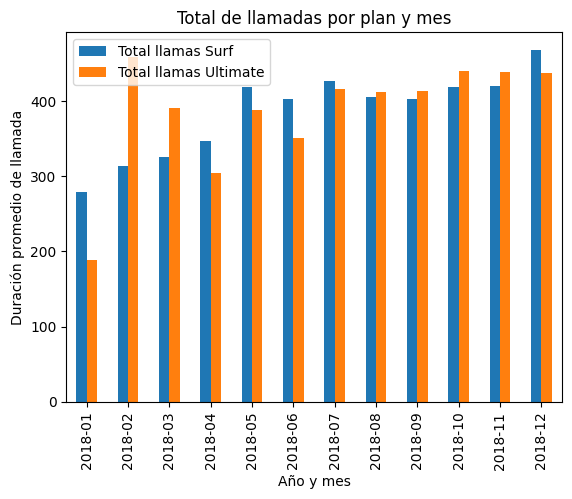

In [190]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
calls_by_plan_month_surf = full_information[full_information['plan_name']=='surf'].groupby(by='year_month')['call_durations'].mean() 
calls_by_plan_month_ultimate = full_information[full_information['plan_name']=='ultimate'].groupby(by='year_month')['call_durations'].mean() 
mean_calls_by_plan_month = pd.concat([calls_by_plan_month_surf,calls_by_plan_month_ultimate], axis='columns')
mean_calls_by_plan_month.columns=['tot_call_duration_surf','tot_call_duration_ulti']
mean_calls_by_plan_month = mean_calls_by_plan_month.reset_index()
#print(mean_calls_by_plan_month.head())

mean_calls_by_plan_month.plot(title='Total de llamadas por plan y mes'
                              , x='year_month'
                              ,y=['tot_call_duration_surf','tot_call_duration_ulti']
                              ,xlabel='Año y mes',ylabel='Duración promedio de llamada', kind='bar')
plt.legend(['Total llamas Surf','Total llamas Ultimate'])
plt.show()

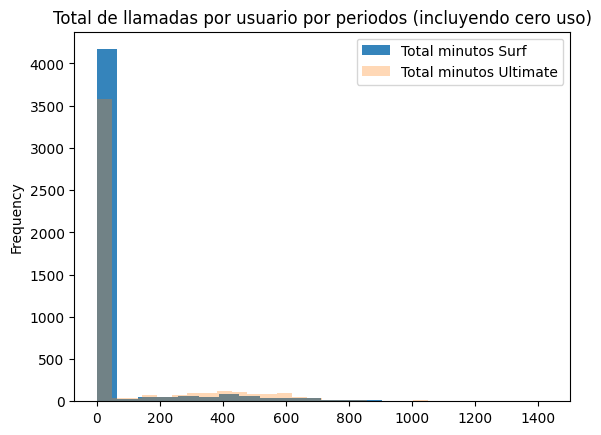

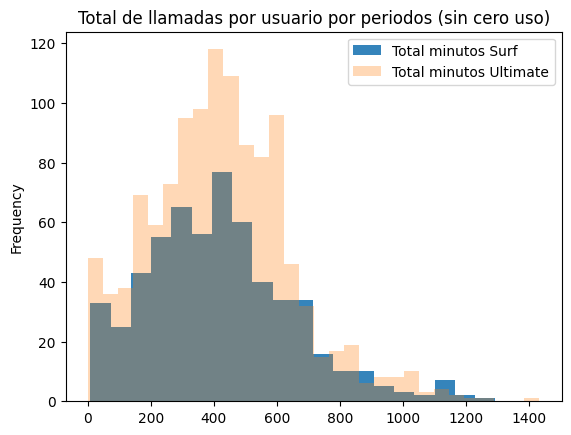

In [191]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
minutes_by_user_month = full_information.groupby(by=['user_id','year_month','plan_name'])['call_durations'].sum().reset_index()
minutes_by_user_month.columns=['user_id','year_month','plan_name','total_minutes_month']


minutes_surf = minutes_by_user_month[minutes_by_user_month['plan_name']=='surf']['total_minutes_month']
minutes_ultimate = minutes_by_user_month[minutes_by_user_month['plan_name']=='ultimate']['total_minutes_month']
minutes_ultimate.plot(title='Total de llamadas por usuario por periodos (incluyendo cero uso)',kind='hist',bins=20,alpha=0.9)
minutes_surf.plot(kind='hist',bins=30,alpha=0.3)
plt.legend(['Total minutos Surf','Total minutos Ultimate'])
plt.show()

# Descartamos todos aquellos datos node no se usó el servicio total_minutes_month = 0.0
minutes_by_user_month = minutes_by_user_month[minutes_by_user_month['total_minutes_month']>0]

#print(minutes_by_user_month.sort_values(by='total_minutes_month', ascending=True).head(2))


minutes_surf = minutes_by_user_month[minutes_by_user_month['plan_name']=='surf']['total_minutes_month']
minutes_ultimate = minutes_by_user_month[minutes_by_user_month['plan_name']=='ultimate']['total_minutes_month']

minutes_ultimate.plot(title='Total de llamadas por usuario por periodos (sin cero uso)',kind='hist',bins=20,alpha=0.9)
minutes_surf.plot(kind='hist',bins=30,alpha=0.3)
plt.legend(['Total minutos Surf','Total minutos Ultimate'])
plt.show()



<div class="alert alert-block alert-info">
Cuando se obtuvo el DataFrame "minutes_by_user_month" se observó que una gran cantidad de usuarios no usaron minutos en los diferentes periodos. Es por eso que realicé un segundo gráfico donde solo incluyo los registro con uso mayor a cero, con eso, podemos observar una mejor comparación del uso de llamadas entre los dos planes.
</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-info">
Ahora, para compara su media y varianza vamos a trabajar con los datos mayor a cero. 
</b> <a class="tocSkip"></a>
</div>

In [192]:
# Calcula la media y la varianza de la duración mensual de llamadas.
var_ultimate = np.var(minutes_ultimate)
var_surf = np.var(minutes_surf)

mean_ultimate = minutes_ultimate.mean()
mean_surf = minutes_surf.mean()

print("La varianza de la duración mensual por usuario del plan ultimate es:", var_ultimate)
print("La media de la duración mensual por usuario del plan ultimate es:", mean_ultimate)
print("La varianza de la duración mensual por usuario del plan surf es:", var_surf)
print("La media de la duración mensual por usuario del plan surf es:", mean_surf)

La varianza de la duración mensual por usuario del plan ultimate es: 55310.218507920166
La media de la duración mensual por usuario del plan ultimate es: 418.8062283737024
La varianza de la duración mensual por usuario del plan surf es: 49450.575997558175
La media de la duración mensual por usuario del plan surf es: 421.2720338983051


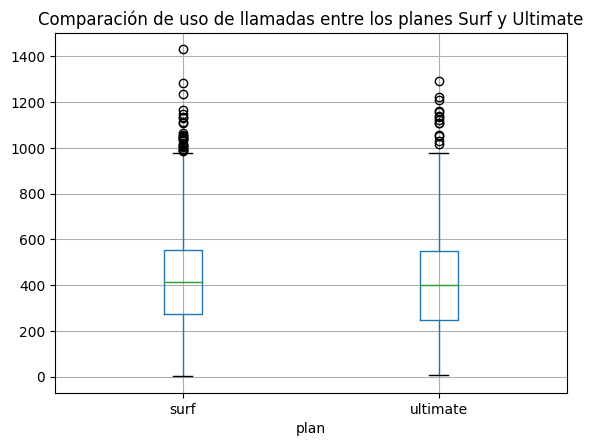

In [193]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
#print(minutes_ultimate.reset_index().head())
minutes_ultimate_bx = minutes_ultimate.reset_index()
minutes_ultimate_bx['plan'] = 'ultimate'
minutes_surf_bx = minutes_surf.reset_index()
minutes_surf_bx['plan'] = 'surf'
minutes_all = pd.concat([minutes_ultimate_bx, minutes_surf_bx],ignore_index=True )
minutes_all['total_minutes_month']= minutes_all['total_minutes_month'].astype(float)
minutes_all.boxplot(column='total_minutes_month', by='plan')
plt.title('Comparación de uso de llamadas entre los planes Surf y Ultimate')
plt.suptitle('')
plt.show()


<div class="alert alert-block alert-info">
Tomando en cuenta solo los usuarios y sus periodos donde sí usaron el servicio, se observa que la media mensual es casí la misma, y el mayor conjunto de uso es poco arriba de los 500 minutos, que es el límites para el plan Surf. Así que las personas que tienen el plan Ultimate, casi nunca exceden ni los 600 minutos, teniendo en cuenta que ellos tiene contratado 3000 minutos.

En este sentipo podríamos decir que los usuario del plan Surf están aprovechan casí al máximo los minutos contratados, en gran contraste contra lo del plan Ultimate, ellos no está aprovechando en nada sus minutos.
</b> <a class="tocSkip"></a>
</div>

### Mensajes

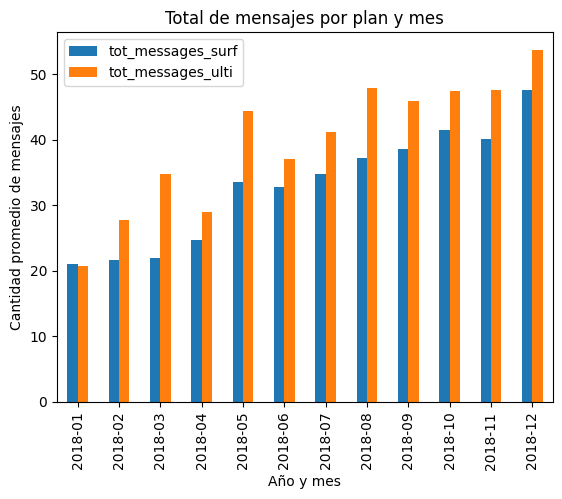

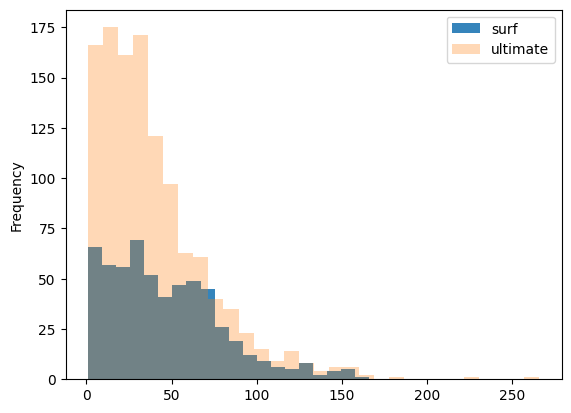

La varianza de la cantidad de mensajes por usuario del plan ultimate es: 1082.5209446338606
La media de la cantidad de mensajes por usuario del plan ultimate es: 46.4559585492228
La varianza de la cantidad de mensajes por usuario del plan surf es: 1043.3329474288998
La media de la cantidad de mensajes por usuario del plan surf es: 39.489830508474576


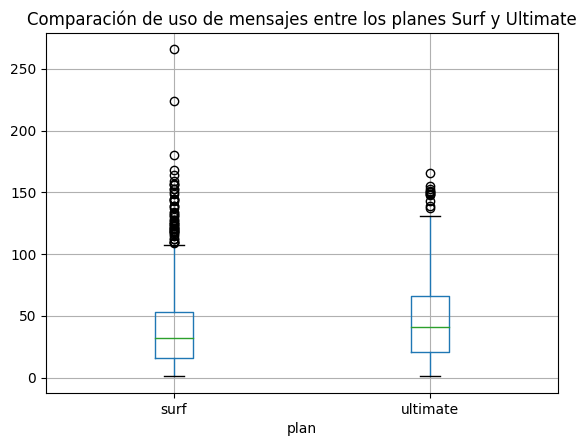

In [194]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
messages_by_plan_month_ultimate = full_information[full_information['plan_name']=='ultimate'].groupby(by='year_month')['messages_count'].mean() 
messages_by_plan_month_surf = full_information[full_information['plan_name']=='surf'].groupby(by='year_month')['messages_count'].mean() 

#Unimos los DataFrames con las agrupaciones apra graficarlos y comparar visiblemente
mean_messages_by_plan_month = pd.concat([messages_by_plan_month_surf,messages_by_plan_month_ultimate], axis='columns')
mean_messages_by_plan_month.columns=['tot_messages_surf','tot_messages_ulti']
mean_messages_by_plan_month = mean_messages_by_plan_month.reset_index()
#print(mean_messages_by_plan_month.head())

mean_messages_by_plan_month.plot(title='Total de mensajes por plan y mes'
                              , x='year_month'
                              ,y=['tot_messages_surf','tot_messages_ulti']
                              ,xlabel='Año y mes',ylabel='Cantidad promedio de mensajes', kind='bar')

plt.show()

#Creamos el dataFrame general que contiene la suma total de mensajes agrupados por usuari y año-mes.
messages_by_user_month = full_information.groupby(by=['user_id','year_month','plan_name'])['messages_count'].sum().reset_index()
messages_by_user_month.columns=['user_id','year_month','plan_name','total_messages_month']

# Descartamos todos aquellos datos donde no se usó el servicio total_minutes_month = 0.0
messages_by_user_month = messages_by_user_month[messages_by_user_month['total_messages_month']>0]

#print(messages_by_user_month.sort_values(by='total_messages_month', ascending=True).head(2))


messages_surf = messages_by_user_month[messages_by_user_month['plan_name']=='surf']['total_messages_month']
messages_ultimate = messages_by_user_month[messages_by_user_month['plan_name']=='ultimate']['total_messages_month']

messages_ultimate.plot(kind='hist',bins=20,alpha=0.9)
messages_surf.plot(kind='hist',bins=30,alpha=0.3)
plt.legend(['surf','ultimate'])
plt.show()

#Calculamos las varianza y media
var_ultimate_messages = np.var(messages_ultimate)
var_surf_messages = np.var(messages_surf)

mean_ultimate_messages = messages_ultimate.mean()
mean_surf_messages = messages_surf.mean()

print("La varianza de la cantidad de mensajes por usuario del plan ultimate es:", var_ultimate_messages)
print("La media de la cantidad de mensajes por usuario del plan ultimate es:", mean_ultimate_messages)
print("La varianza de la cantidad de mensajes por usuario del plan surf es:", var_surf_messages)
print("La media de la cantidad de mensajes por usuario del plan surf es:", mean_surf_messages)

messages_ultimate_box = messages_ultimate.reset_index()
messages_ultimate_box['plan'] = 'ultimate'
messages_surf_box = messages_surf.reset_index()
messages_surf_box['plan'] = 'surf'
messages_all = pd.concat([messages_ultimate_box,messages_surf_box], ignore_index=True)

messages_all.boxplot(column='total_messages_month',by='plan')
plt.title('Comparación de uso de mensajes entre los planes Surf y Ultimate')
plt.suptitle('')
plt.show()

<div class="alert alert-block alert-info">
Tomando en cuenta solo los usuarios y sus periodos donde sí usaron el servicio de mensajes, se observa que la media mensual es casí la misma, y el mayor conjunto de uso es entre 39 y 46 mensajes. Así que las personas que tienen el plan Ultimate, están muy lejos del total de mensajes que tienen disponibles, que son 1000 SMS.

Por su parte, los usuarios del plan Surf están aprovechan al máximo los mensajes contratados, y hasta podríamos decir que un gran volumen lo está excediento, ya que la medía de 39, está muy cerca de los 50 SMS que tiene de límite.
</b> <a class="tocSkip"></a>
</div>

### Internet

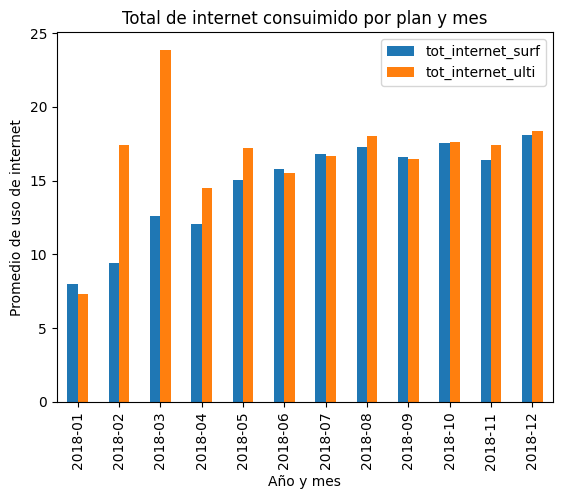

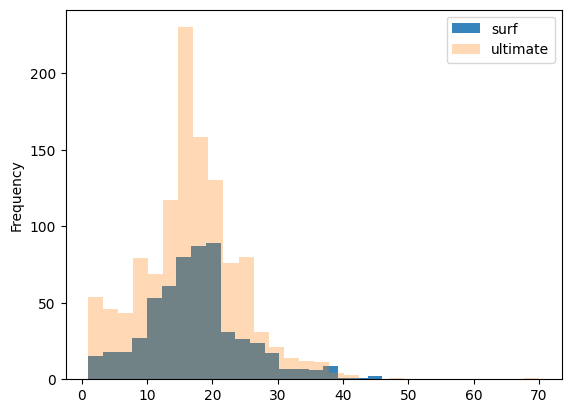

La varianza de la cantidad de internet consumido por usuario del plan ultimate es: 56.077037116581806
La media de la cantidad de internet consumido por usuario del plan ultimate es: 17.34369602763385
La varianza de la cantidad de internet consumido por usuario del plan surf es: 56.964188451594374
La media de la cantidad de internet consumido por usuario del plan surf es: 16.752542372881354


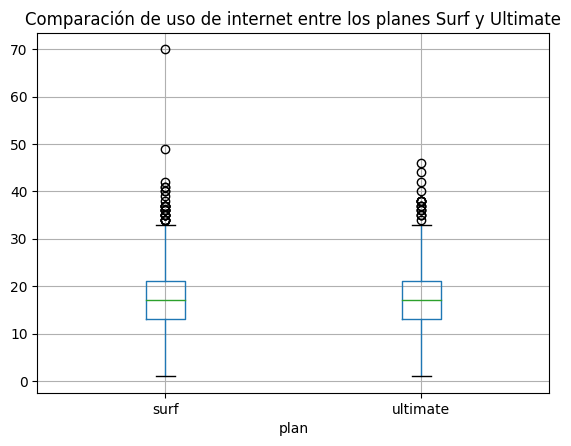

In [195]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
internet_by_plan_month_ultimate = full_information[full_information['plan_name']=='ultimate'].groupby(by='year_month')['internet_consumed'].mean() 
internet_by_plan_month_surf = full_information[full_information['plan_name']=='surf'].groupby(by='year_month')['internet_consumed'].mean() 
mean_internet_by_plan_month = pd.concat([internet_by_plan_month_surf,internet_by_plan_month_ultimate], axis='columns')
mean_internet_by_plan_month.columns=['tot_internet_surf','tot_internet_ulti']
mean_internet_by_plan_month = mean_internet_by_plan_month.reset_index()
#print(mean_internet_by_plan_month.head())

mean_internet_by_plan_month.plot(title='Total de internet consuimido por plan y mes'
                              , x='year_month'
                              ,y=['tot_internet_surf','tot_internet_ulti']
                              ,xlabel='Año y mes',ylabel='Promedio de uso de internet', kind='bar')

plt.show()

internet_by_user_month = full_information.groupby(by=['user_id','year_month','plan_name'])['internet_consumed'].sum().reset_index()
internet_by_user_month.columns=['user_id','year_month','plan_name','total_internet_month']

# Descartamos todos aquellos datos node no se usó el servicio total_internet_month = 0.0
internet_by_user_month = internet_by_user_month[internet_by_user_month['total_internet_month']>0]

#Convertimos los megas usado a Giga para una mejor comparación con los planes contatados
internet_by_user_month['total_internet_month'] =internet_by_user_month['total_internet_month'] 

#print(internet_by_user_month.sort_values(by='total_internet_month', ascending=True).head(2))


internet_surf = internet_by_user_month[internet_by_user_month['plan_name']=='surf']['total_internet_month']
internet_ultimate = internet_by_user_month[internet_by_user_month['plan_name']=='ultimate']['total_internet_month']

internet_ultimate.plot(kind='hist',bins=20,alpha=0.9)
internet_surf.plot(kind='hist',bins=30,alpha=0.3)
plt.legend(['surf','ultimate'])
plt.show()


var_ultimate_internet = np.var(internet_ultimate)
var_surf_internet = np.var(internet_surf)

mean_ultimate_internet = internet_ultimate.mean()
mean_surf_internet = internet_surf.mean()

print("La varianza de la cantidad de internet consumido por usuario del plan ultimate es:", var_ultimate_internet)
print("La media de la cantidad de internet consumido por usuario del plan ultimate es:", mean_ultimate_internet)
print("La varianza de la cantidad de internet consumido por usuario del plan surf es:", var_surf_internet)
print("La media de la cantidad de internet consumido por usuario del plan surf es:", mean_surf_internet)

internet_ultimate_box = internet_ultimate.reset_index()
internet_ultimate_box['plan'] = 'ultimate'
internet_surf_box = internet_surf.reset_index()
internet_surf_box['plan'] = 'surf'
internet_all = pd.concat([internet_ultimate_box,internet_surf_box], ignore_index=True)


internet_all.boxplot(column='total_internet_month', by='plan')
plt.title('Comparación de uso de internet entre los planes Surf y Ultimate')
plt.suptitle('')
plt.show()


<div class="alert alert-block alert-info">
Tomando en cuenta solo los usuarios y sus periodos donde sí usaron el servicio de internet, se observa que el uso que le dan los clientes tanto plane Surf como plan Ultimate es casi idéntico. Ambos tiene una media de ~16G y una varianza de ~56G. Esto nos dice que un gran número de clientes Surf está excediendo su consumo contratado y ahí es un gran nicho de oportunidad para invitarlo a subir de plan.

Por su parte, los usuario de plan Ultimate están un poco lejos de su uso contratado, acá incluso podríamos ofrecer un poco más de Gb para ser más atractivo el plan sabiendo que es mínma la cantida de gente que si quiera lo rebasa. Un hotsale u ofertón =).
</b> <a class="tocSkip"></a>
</div>

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

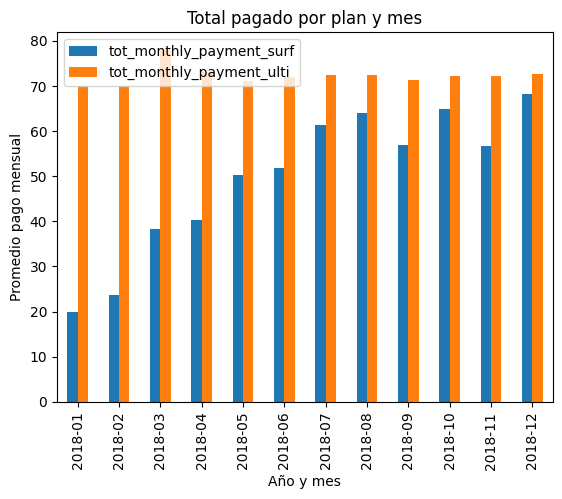

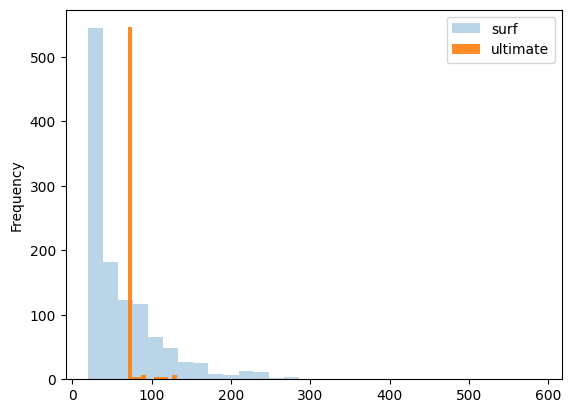

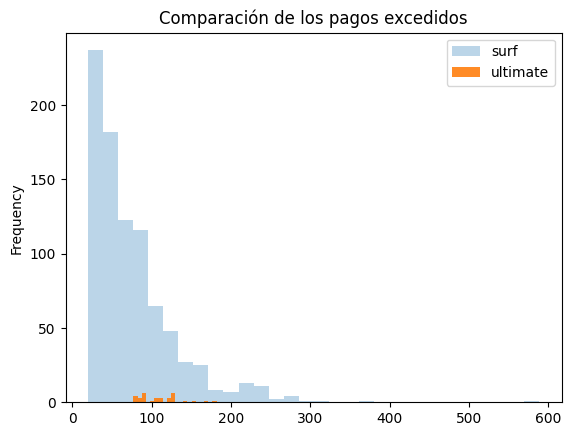

La varianza de la cantidad pago mensual por usuario del plan ultimate es: 121.5478178385102
La media de la cantidad de pago mensual por usuario del plan ultimate es: 72.24870466321244
La varianza de la cantidad de pago mensual por usuario del plan surf es: 2853.52643229898
La media de la cantidad de pago mensual por usuario del plan surf es: 60.01460169491525


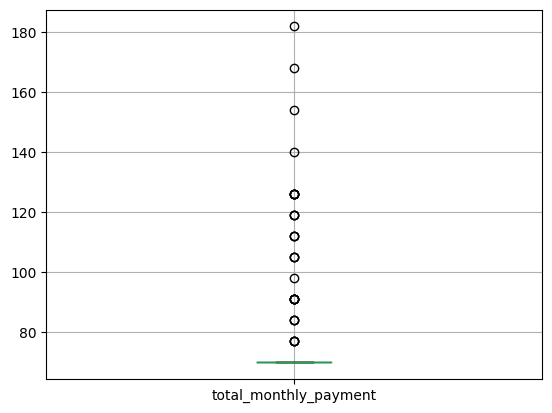

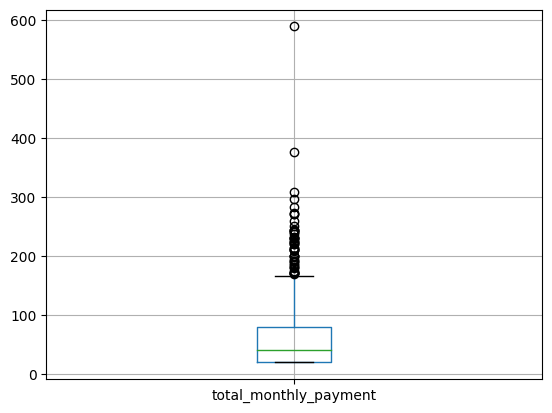

In [196]:
monthly_payment_by_plan_month_ultimate = full_information[full_information['plan_name']=='ultimate'].groupby(by='year_month')['monthly_payment'].mean() 
monthly_payment_by_plan_month_surf = full_information[full_information['plan_name']=='surf'].groupby(by='year_month')['monthly_payment'].mean() 
mean_monthly_payment_by_plan_month = pd.concat([monthly_payment_by_plan_month_surf,monthly_payment_by_plan_month_ultimate], axis='columns')
mean_monthly_payment_by_plan_month.columns=['tot_monthly_payment_surf','tot_monthly_payment_ulti']
mean_monthly_payment_by_plan_month = mean_monthly_payment_by_plan_month.reset_index()
#print(mean_monthly_payment_by_plan_month.head())

mean_monthly_payment_by_plan_month.plot(title='Total pagado por plan y mes'
                              , x='year_month'
                              ,y=['tot_monthly_payment_surf','tot_monthly_payment_ulti']
                              ,xlabel='Año y mes',ylabel='Promedio pago mensual', kind='bar')

plt.show()

monthly_payment_by_user_month = full_information.groupby(by=['user_id','year_month','plan_name'])['monthly_payment'].sum().reset_index()
monthly_payment_by_user_month.columns=['user_id','year_month','plan_name','total_monthly_payment']

# Descartamos todos aquellos datos donde hay registro 0.0
monthly_payment_by_user_month = monthly_payment_by_user_month[monthly_payment_by_user_month['total_monthly_payment']>0]

#print(monthly_payment_by_user_month.sort_values(by='total_monthly_payment', ascending=True).head(20))

monthly_payment_surf = monthly_payment_by_user_month[monthly_payment_by_user_month['plan_name']=='surf']['total_monthly_payment']
monthly_payment_ultimate = monthly_payment_by_user_month[monthly_payment_by_user_month['plan_name']=='ultimate']['total_monthly_payment']

monthly_payment_surf.plot(kind='hist',bins=30,alpha=0.3)
monthly_payment_ultimate.plot(kind='hist',bins=20,alpha=0.9)

plt.legend(['surf','ultimate'])
plt.show()


# En cada plan, vamos a considerar la frencuenda solo de quierens pagaron más del plan que tenían contratado
monthly_payment_surf_exced = monthly_payment_surf.reset_index()
monthly_payment_surf_exced = monthly_payment_surf_exced[monthly_payment_surf_exced['total_monthly_payment']>20]

monthly_payment_ultimate_exced = monthly_payment_ultimate.reset_index()
monthly_payment_ultimate_exced = monthly_payment_ultimate_exced[monthly_payment_ultimate_exced['total_monthly_payment']>70]
monthly_payment_surf_exced['total_monthly_payment'].plot(kind='hist',bins=30,alpha=0.3)
monthly_payment_ultimate_exced['total_monthly_payment'].plot(kind='hist',bins=20,alpha=0.9)
plt.title('Comparación de los pagos excedidos')
plt.legend(['surf','ultimate'])
plt.show()


var_ultimate_monthly_payment = np.var(monthly_payment_ultimate)
var_surf_monthly_payment = np.var(monthly_payment_surf)

mean_ultimate_monthly_payment = monthly_payment_ultimate.mean()
mean_surf_monthly_payment = monthly_payment_surf.mean()

print("La varianza de la cantidad pago mensual por usuario del plan ultimate es:", var_ultimate_monthly_payment)
print("La media de la cantidad de pago mensual por usuario del plan ultimate es:", mean_ultimate_monthly_payment)
print("La varianza de la cantidad de pago mensual por usuario del plan surf es:", var_surf_monthly_payment)
print("La media de la cantidad de pago mensual por usuario del plan surf es:", mean_surf_monthly_payment)

monthly_payment_ultimate.reset_index().boxplot(column='total_monthly_payment')
plt.show()
monthly_payment_surf.reset_index().boxplot(column='total_monthly_payment')
plt.show()

<div class="alert alert-block alert-info">
Con respecto al ingreso promedio se observa los clientes del plan Ultimate se acercan mucho al consumo según su plan contratado, es decir 70.0. Eso nos dice que son muy poco los casos donde clientes con este plan se excedan alguno de los servicios y paguen esos consumos extra.

En contraste, el promedio de ingreso de los clientes del plan Surf, está muy lejos del conto del plan contratado, que es 20. El promedio de ese conjunto es de 56, con una varianza de 2683!, esto refleja que estos usuarios están sobre usando el servicio de internet, esto lo se por el análisis anterior.

</div>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones
</div>

## Prueba las hipótesis estadísticas



<div class="alert alert-block alert-info">
Vamos a probar la hipótesis: El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.
    

La Hipótesis nula será: H_0 = El ingreso promedio de los clientes del plan Ultimate es igual al ingreso promedio de los clientes Surf.

La Hipótesis alternativa será: H_1 = El ingreso promedio de los clientes del plan Ultimate es diferente al ingreso promedio de los clientes Surf.

Como tenemos dos conjunto de datos y nos intersa saber si su media difiere, vamos a utilizar le método "sobre la igualdad de las medias de dos poblaciones", ahi nos dice que se utiliza una prueba t de dos muestras independientes (ttest_ind) porque se comparan dos grupos no relacionados, y queremos probar si sus medias son significativamente diferentes.

Estableceremos nuestro nivel crítico de significación estadística en alpha = 0.05, que es un estándar habitual para permitir un 5% de probabilidad de error.

</div>

In [197]:
# Prueba las hipótesis

alpha = 0.05# nivel crítico de significación estadística

results = st.ttest_ind(monthly_payment_surf,monthly_payment_ultimate, equal_var= False)
#  prueba la hipótesis de que las medias de las dos poblaciones independientes son diferentes

print('valor p:', results.pvalue)

if  results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p: 8.319558977074422e-14
Rechazamos la hipótesis nula


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]


<div class="alert alert-block alert-info">
Vamos a probar la hipótesis:El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.
    
</br>
La Hipótesis nula será: H_0 = El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es igual al de los usuarios de otras regiones.

La Hipótesis alternativa será: H_1 = El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.

Como tenemos dos conjunto de datos y nos intersa saber si su media difiere, vamos a utilizar le método "sobre la igualdad de las medias de dos poblaciones", ahi nos dice que se utiliza una prueba t de dos muestras independientes (ttest_ind) porque se comparan dos grupos no relacionados, y queremos probar si sus medias son significativamente diferentes.

Estableceremos nuestro nivel crítico de significación estadística en alpha = 0.05, que es un estándar habitual para permitir un 5% de probabilidad de error.

</div>

In [198]:
#primero vamos a obtener el conjunto de datos de los usuarios de New York-Newark-Jersey City y el del resto de las ciudades
# ny = full_information.groupby(by=['city'])['monthly_payment'].sum().reset_index()
# ny = ny[ny['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']
# print(ny.head(100))
monthly_payment_by_city = full_information.groupby(by=['user_id','year_month','city'])['monthly_payment'].sum().reset_index()
monthly_payment_by_city.columns=['user_id','year_month','city','total_monthly_payment']
monthly_payment_NY_NJ = monthly_payment_by_city[monthly_payment_by_city['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']['total_monthly_payment']
monthly_payment_ALL_others = monthly_payment_by_city[monthly_payment_by_city['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA']['total_monthly_payment']


var_monthly_payment_NY_NJ = np.var(monthly_payment_NY_NJ)
var_monthly_payment_ALL_others= np.var(monthly_payment_ALL_others)

mean_monthly_payment_NY_NJ = monthly_payment_NY_NJ.mean()
mean_monthly_payment_ALL_others = monthly_payment_ALL_others.mean()

print("La varianza de la cantidad pago mensual por usuario de New York-Newark-Jersey City es:", var_monthly_payment_NY_NJ)
print("La media de la cantidad de pago mensual por usuario de New York-Newark-Jersey City es:", mean_monthly_payment_NY_NJ)
print("La varianza de la cantidad de pago mensual por usuario de las demás ciudades es:", var_monthly_payment_ALL_others)
print("La media de la cantidad de pago mensual por usuario de las demás ciudades es:", mean_monthly_payment_ALL_others)


# Prueba las hipótesis

alpha = 0.05# nivel crítico de significación estadística

results = st.ttest_ind(monthly_payment_NY_NJ,monthly_payment_ALL_others, equal_var= False)
#  prueba la hipótesis de que las medias de las dos poblaciones independientes son diferentes

print('valor p:', results.pvalue)

if  results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

La varianza de la cantidad pago mensual por usuario de New York-Newark-Jersey City es: 1506.440609784047
La media de la cantidad de pago mensual por usuario de New York-Newark-Jersey City es: 57.68949820788531
La varianza de la cantidad de pago mensual por usuario de las demás ciudades es: 2068.9161397207818
La media de la cantidad de pago mensual por usuario de las demás ciudades es: 65.23909459459459
valor p: 0.0040279914524273056
Rechazamos la hipótesis nula


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de las pruebas de hipótesis. Solamente en futuras ocasiones te recomiendo considerar realizar la prueba de levene para mostrar el supuesto de varianzas iguales. 

## Conclusión general


<div class="alert alert-block alert-info">

1. La información que nos proporcionó Megaline, en gran media, está íntegra y completa, es una buena señal que la empresa mantiene muy ordenada su información.
2. Sobre la información, fue necesario convertir sus campos fecha a formatos fecha para mayor agilidad en la creación de DataFrames y sobre todo para realizar las uniones pertinente.
3. El revisar cada servicio, se observó que hay muchos usuario que no usan el servico de llamadas principalmente, pero tapoco los otros, así que para analizar y comparar lso conusmos (efectivos), utilicé solo aquemos meses donde sí hubo un consumo mayor a 0.0
4. En los diferentes planes que ofrece Megaline, se observa que de los tres sevicios, el Internet es el más usado y más aun, es el que tiene más excedentes en el plan Surf.
5. Los clientes que usan el plan Ultimate, tiene muy sub-usado los tres servicios, tanto que la media de pago menusal es de 72, cuando el costo de ese plan es de 70.
6. Los clientes que usan el plan Surf, están excediendo mucho sus servicios contratados, tiene una media de pago mensual de 56, cuando el costo de ese plan es de 20.
7. Se puede concluir que Ultimate es un excelente plan, cubre en gran medida y en los diferente servicios las necesidades de sus cliente.
8. El plan surf ya está quedando muy corto para las necesidades de los clientes, principalmente en el uso de internet.
9. El ingreso promedio de los usuarios de las tarifas Ultimate y Surf es difieren.
10. El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.
</div>
